<div>
 <img src="https://media4.giphy.com/media/l0DEKnWCEnW5FeyJi/giphy.gif?cid=ecf05e4746d3984002acd52b8f247fcf58cca1a853f0f0fe&rid=giphy.gif" >

<h1><center>📚Book-Crossing Analysis📚</center></h1>
<br>
This dataset contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books. 
<br>
 <br>
</div>

> 📖**Dataset description**:
* `BX-Books.csv` has 8 columns which include information about books. 
 <ul style="list-style-type:circle;">
    <li>We can uniquely identify each book with the help of ISBN(International Standard Book Number). </li>
    <li>The title, author,publisher and year of publication of each book have been listed. </li>
    <li>The last three columns include the URLs for different sizes of images.</li>
    </ul>
* `BX-Users.csv` lists the age and location of a user along with their User-ID.
* `BX-Book-Ratings.csv` contains book ratings given by users. The User-ID and ISBN have also been provided.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bookcrossing-dataset/Book reviews/BX-Book-Ratings.csv
/kaggle/input/bookcrossing-dataset/Book reviews/BX_Books.csv
/kaggle/input/bookcrossing-dataset/Book reviews/BX-Users.csv


<div class="alert alert-warning" role="alert">
  <h3><strong>Imports</strong></h3>
</div>

In [2]:
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import requests

from PIL import Image as im
from wordcloud import WordCloud,STOPWORDS
from IPython.core.display import Image
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

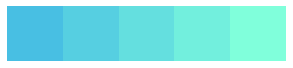

In [3]:
custom_colors = ['#48bfe3','#56cfe1','#64dfdf','#72efdd','#80ffdb']
customPalette = sns.color_palette(custom_colors)
sns.palplot(sns.color_palette(custom_colors),size=1)

sns.set_context("poster")

<div class="alert alert-warning" role="alert">
  <h3><strong>Reading the 3 csv files</strong></h3>
</div>

In [4]:
#Users
u_cols = ['user_id', 'location', 'age']
users = pd.read_csv('../input/bookcrossing-dataset/Book reviews/BX-Users.csv', sep=';', names=u_cols, encoding='latin-1',low_memory=False)

#Books
i_cols = ['isbn', 'book_title' ,'book_author','year_of_publication', 'publisher', 'img_s', 'img_m', 'img_l']
items = pd.read_csv('../input/bookcrossing-dataset/Book reviews/BX_Books.csv', sep=';', names=i_cols, encoding='latin-1',low_memory=False)

#Ratings
r_cols = ['user_id', 'isbn', 'rating']
ratings = pd.read_csv('../input/bookcrossing-dataset/Book reviews/BX-Book-Ratings.csv', sep=';', names=r_cols, encoding='latin-1',low_memory=False)

<div class="alert alert-warning" role="alert">
  <h3><strong>What does the data look like?</strong></h3>
</div>

In [5]:
users.head(5)

,user_id,location,age
0,User-ID,Location,Age
1,1,"nyc, new york, usa",NaN
2,2,"stockton, california, usa",18
3,3,"moscow, yukon territory, russia",NaN
4,4,"porto, v.n.gaia, portugal",17


In [6]:
users.describe()

,user_id,location,age
count,278859,278859,168097
unique,278859,57340,166
top,254441,"london, england, united kingdom",24
freq,1,2506,5687


In [7]:
print(f"{y_}{users.dtypes}\n") 

user_id     object
location    object
age         object
dtype: object



In [8]:
items.head(5)

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
0,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...


In [9]:
items.describe()

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
count,271380,271380,271379,271380,271378,271380,271380,271380
unique,271380,242155,102029,117,16806,271064,271064,271064
top,0425166155,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/044640361X.0...,http://images.amazon.com/images/P/187911125X.0...,http://images.amazon.com/images/P/000651202X.0...
freq,1,27,632,17628,7536,2,2,2


In [10]:
print(f"{y_}{items.dtypes}\n") 

isbn                   object
book_title             object
book_author            object
year_of_publication    object
publisher              object
img_s                  object
img_m                  object
img_l                  object
dtype: object



In [11]:
ratings.head(5)

,user_id,isbn,rating
0,User-ID,ISBN,Book-Rating
1,276725,034545104X,0
2,276726,0155061224,5
3,276727,0446520802,0
4,276729,052165615X,3


In [12]:
ratings.describe()

,user_id,isbn,rating
count,1149781,1149781,1149781
unique,105284,340557,12
top,11676,0971880107,0
freq,13602,2502,716109


In [13]:
print(f"{y_}{ratings.dtypes}\n") 

user_id    object
isbn       object
rating     object
dtype: object



In [14]:
users = users.drop(users.index[0])
items = items.drop(items.index[0])
ratings = ratings.drop(ratings.index[0])

<div class="alert alert-warning" role="alert">
  <h3><strong>Changing datatypes</strong></h3>
</div>

In [15]:
users['age'] = users['age'].astype(float)
users['user_id'] = users['user_id'].astype(int)
ratings['user_id'] = ratings['user_id'].astype(int)
ratings['rating'] = ratings['rating'].astype(int)

In [16]:
users['age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: age, dtype: float64

In [17]:
users.loc[(users.age>99) | (users.age<5),'age'] = np.nan

<div class="alert alert-warning" role="alert">
  <h3><strong>Merging the dataframes using User-ID and ISBN columns</strong></h3
</div>

In [18]:
df = pd.merge(users, ratings, on='user_id')
df = pd.merge(df, items, on='isbn')
df.head(5)

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385,"sudbury, ontario, canada",NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [19]:
df.shape

(1031175, 12)

<div class="alert alert-warning" role="alert">
  <h3><strong>Spitting location column into newer columns</strong></h3>
</div>

In [20]:
location = df.location.str.split(', ', n=2, expand=True)
location.columns=['city', 'state', 'country']

df['city'] = location['city']
df['state'] = location['state']
df['country'] = location['country']

<div class="alert alert-warning" role="alert">
  <h3><strong>Fetching images of different sizes from the URLs</strong></h3>
</div>

In [21]:
def images(col,i):
    url = df[col][i]
    response = requests.get(url)
    img = Image(url)
    return img

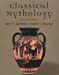

In [22]:
images('img_s',0)

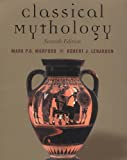

In [23]:
images('img_m',0)

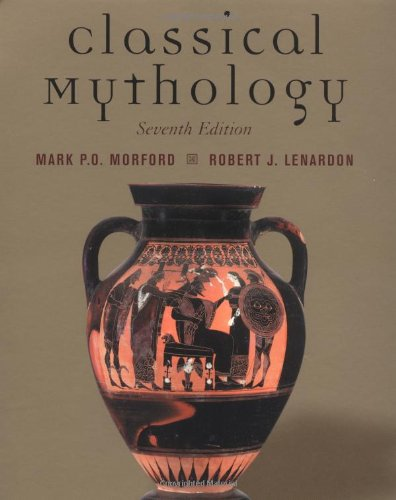

In [24]:
images('img_l',0)

<div class="alert alert-warning" role="alert">
  <h3><strong>Dropping columns we won't be needing</strong></h3>
</div>

In [25]:
df = df.drop(['location','img_s','img_m','img_l'], axis = 1)

In [26]:
df.dtypes

user_id                  int64
age                    float64
isbn                    object
rating                   int64
book_title              object
book_author             object
year_of_publication     object
publisher               object
city                    object
state                   object
country                 object
dtype: object

<div class="alert alert-warning" role="alert">
  <h3><strong>Pandas Profiling</strong></h3>
</div>

In [27]:
# profile = pandas_profiling.ProfileReport(df)
# profile

<div class="alert alert-warning" role="alert">
  <h3><strong>Rating Distribution</strong></h3>
</div>

> 📌Note: This dataset contains both **explicit** ratings, on a 1–10 scale and **implicit** actions of unspecified nature. 

> 0 values indicate all interactions without rating values.

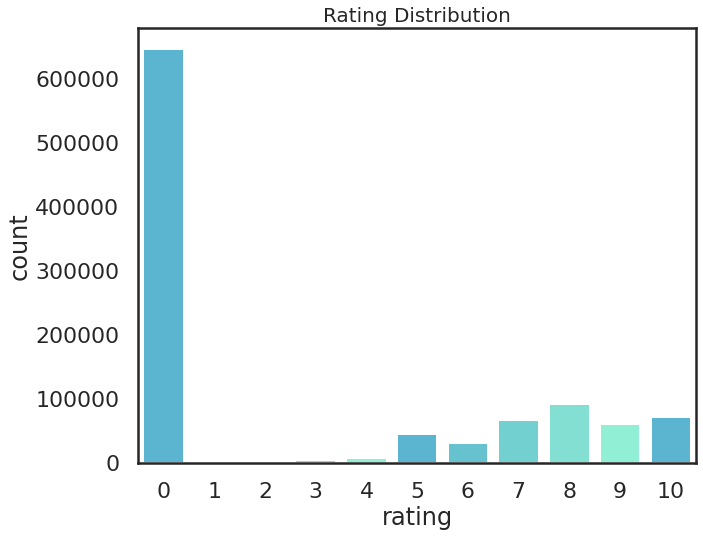

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',data=df,palette=customPalette)
plt.title('Rating Distribution',size=20)
plt.show()

<div class="alert alert-warning" role="alert">
  <h3><strong>Distribution of age of users</strong></h3>
</div>

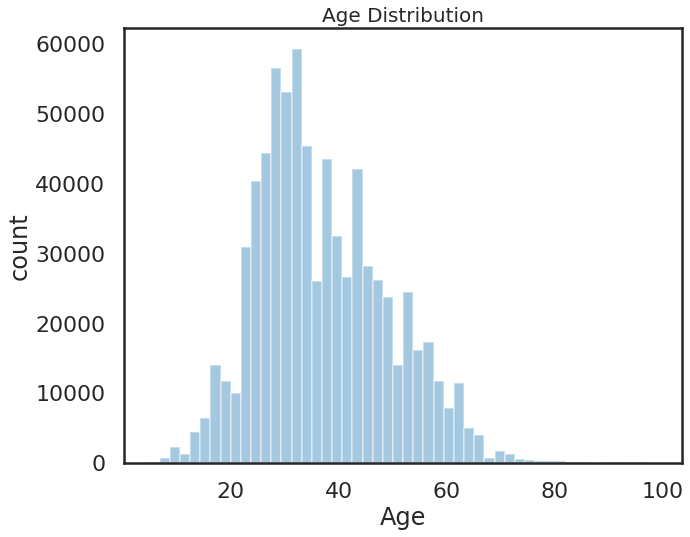

In [29]:
plt.figure(figsize=(10,8))
sns.distplot(df['age'],kde=False)
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age Distribution',size=20)
plt.show()

<div class="alert alert-warning" role="alert">
  <h3><strong>Top 15 Years of Publication</strong></h3>
</div>

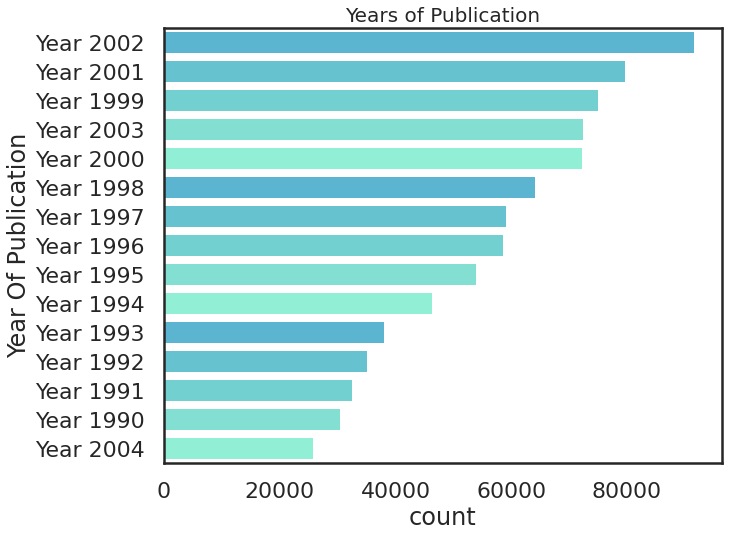

In [30]:
df_v=df['year_of_publication'].value_counts().head(15).reset_index()
df_v.columns=['year','count']
df_v['year']='Year '+df_v['year']

plt.figure(figsize=(10,8))
sns.barplot(x='count',y='year',data=df_v,palette=customPalette)
plt.ylabel('Year Of Publication')
plt.title('Years of Publication',size=20)
plt.show()

In [31]:
def barplot(df,col,l):
    df_v=df[col].value_counts().head(25).reset_index()
    df_v.columns=[col,'count']

    plt.figure(figsize=(10,12))
    sns.barplot(x='count',y=col,data=df_v,palette=customPalette)
    plt.ylabel(l)
    plt.title(l,size=20)
    plt.show()

<div class="alert alert-warning" role="alert">
  <h3><strong>Top 25 Books</strong></h3>
</div>

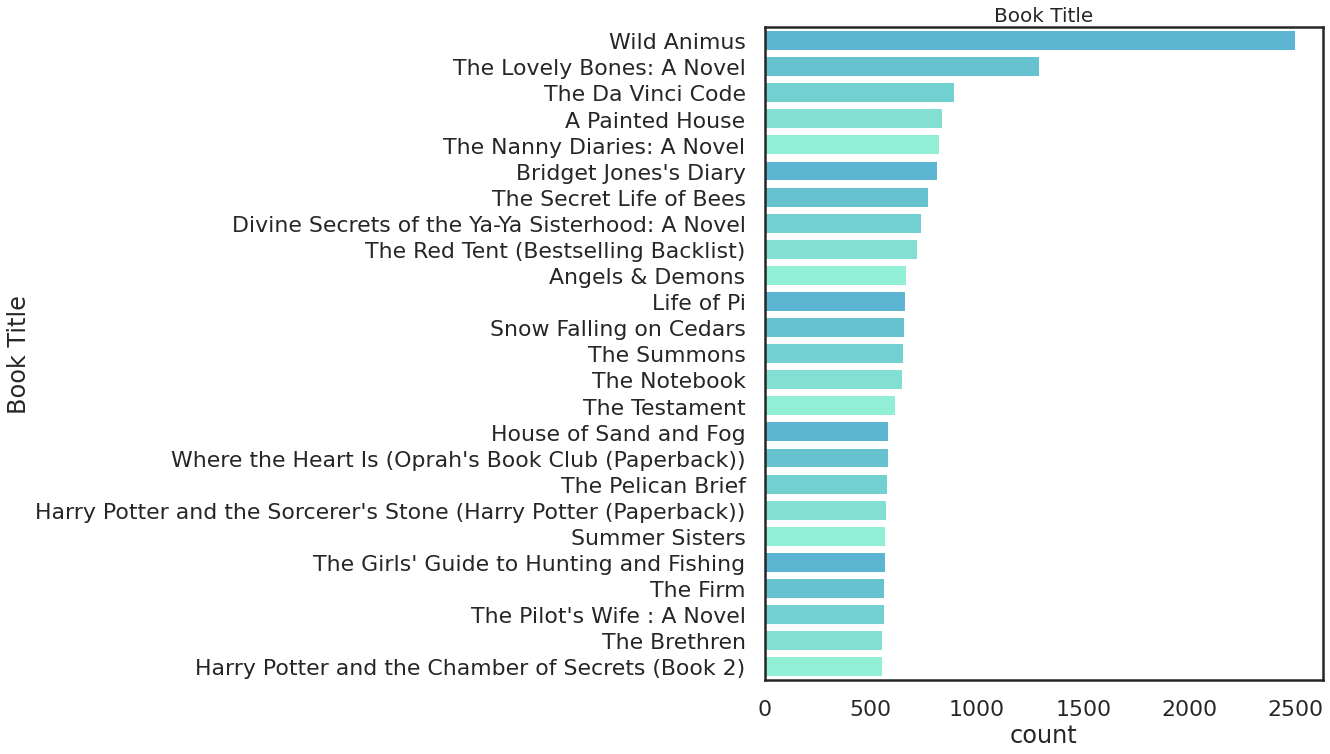

In [32]:
barplot(df,'book_title','Book Title')

<div class="alert alert-warning" role="alert">
  <h3><strong>Top 25 Authors</strong></h3>
</div>

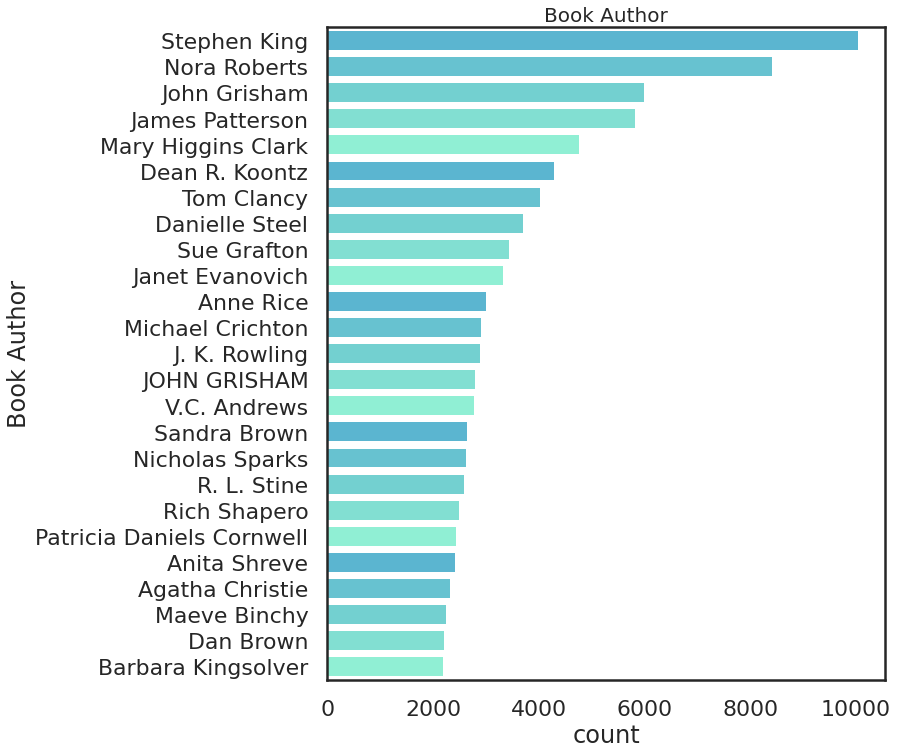

In [33]:
barplot(df,'book_author','Book Author')

<div class="alert alert-warning" role="alert">
  <h3><strong>Top 25 Publishers</strong></h3>
</div>

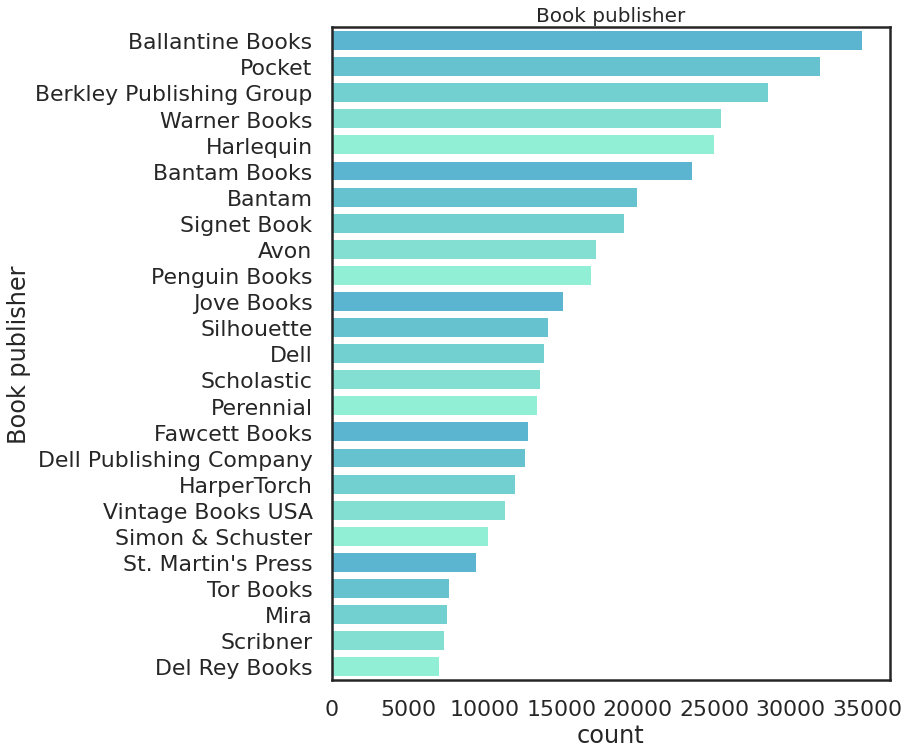

In [34]:
barplot(df,'publisher','Book publisher')

<div class="alert alert-warning" role="alert">
  <h3><strong>Wordcloud of book titles</strong></h3>
</div>

In [35]:
def color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(188)
    s = int(100.0 * 255 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 160)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

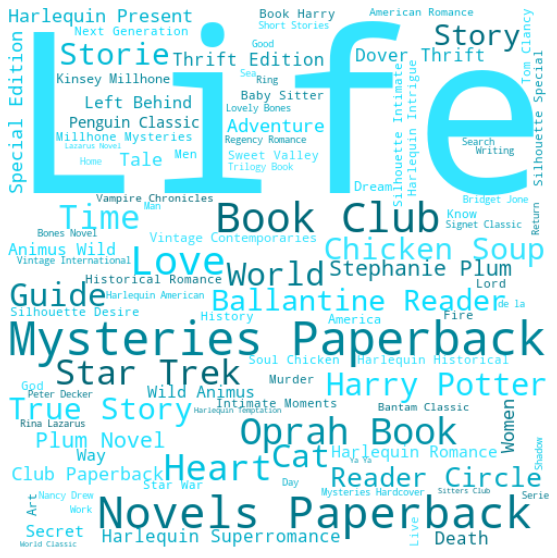

In [36]:
plt.subplots(figsize=(10,10))
wc = WordCloud(background_color="white", max_words=100,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500,color_func=color_func)
wc.generate(' '.join(df['book_title']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()